In [1]:
import pandas as pd
import ast
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('../data/result.csv')
data['tags'] = data['tags'].apply(ast.literal_eval)
mlb = MultiLabelBinarizer()
tags_binarized = mlb.fit_transform(data['tags'])
tags_df = pd.DataFrame(tags_binarized, columns=mlb.classes_)
data = pd.concat([data, tags_df], axis=1)
data.drop(columns='tags', inplace=True)

In [3]:
tag_cnt = [(tag, data[tag].sum()) for tag in tags_df]
tag_cnt = sorted(tag_cnt, key=lambda x : -x[1])

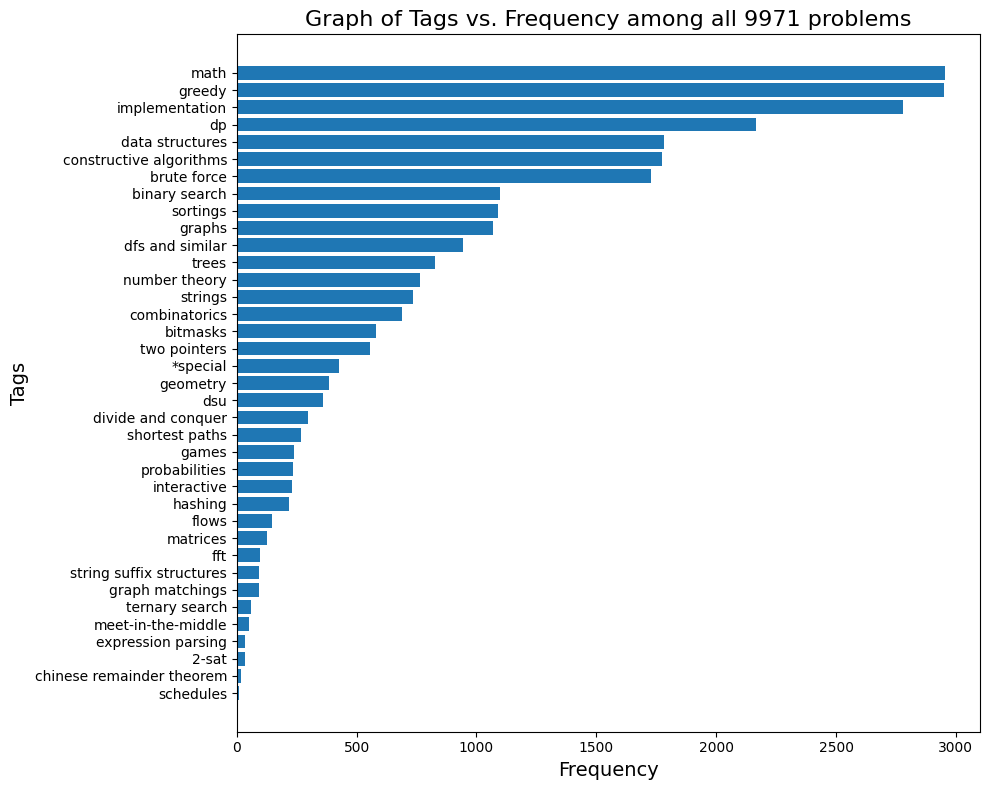

In [4]:
labels, values = zip(*tag_cnt)

plt.figure(figsize=(10, 8))
plt.barh(labels, values)
plt.title(f'Graph of Tags vs. Frequency among all {data.shape[0]} problems', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Tags', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [5]:
data = pd.read_csv('../data/result.csv')
data = data.dropna(subset=['Statement'])
data['Statement_Len'] = data['Statement'].apply(len)

In [6]:
data['Statement_Len'].describe()

count    9968.000000
mean      965.677368
std       500.364984
min         1.000000
25%       623.750000
50%       886.000000
75%      1221.000000
max      9873.000000
Name: Statement_Len, dtype: float64

In [7]:
baseline = {
    "Dataset": ["Baseline"] * 5,
    "Category": ["Math", "Greedy", "Implementation", "Dp", "Data Structures"],
    "Accuracy": [0.7313, 0.7318, 0.7544, 0.7900, 0.8466],
    "AUC": [0.7310, 0.7649, 0.7051, 0.7395, 0.8120],
}

trained_model = {
    "Dataset": ["Trained Model"] * 5,
    "Category": ["Math", "Greedy", "Implementation", "Dp", "Data Structures"],
    "Accuracy": [0.7328, 0.7584, 0.7544, 0.7950, 0.8511],
    "AUC": [0.7448, 0.8012, 0.7325, 0.7886, 0.8283],
}

short_statement = {
    "Dataset": ["Short Statement"] * 5,
    "Category": ["Math", "Greedy", "Implementation", "Dp", "Data Structures"],
    "Accuracy": [0.8095, 0.8165, 0.8105, 0.8356, 0.8717],
    "AUC": [0.8411, 0.8795, 0.8317, 0.8396, 0.8749],
}

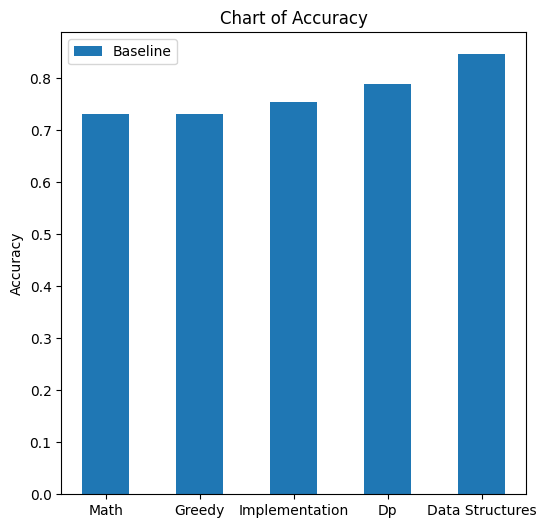

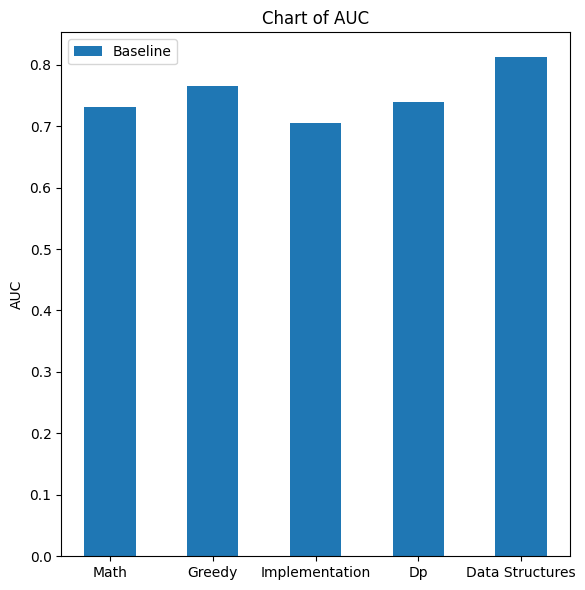

In [11]:
df1 = pd.DataFrame(baseline)
df2 = pd.DataFrame(trained_model)
df3 = pd.DataFrame(short_statement)
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# Plotting
categories = combined_df['Category'].unique()
x = np.arange(len(categories))  # the label locations
width = 0.5  # the width of the bars

# Accuracy plot
fig_accur = plt.figure(figsize=(6, 6))
ax_accur = fig_accur.add_subplot(111)

set_1 = combined_df[combined_df['Dataset'] == "Baseline"]["Accuracy"]
set_2 = combined_df[combined_df['Dataset'] == "Trained Model"]["Accuracy"]
set_3 = combined_df[combined_df['Dataset'] == "Short Statement"]["Accuracy"]


ax_accur.bar(x, set_1, width, label='Baseline')
ax_accur.set_ylabel('Accuracy')
ax_accur.set_title("Chart of Accuracy")
ax_accur.set_xticks(x)
ax_accur.set_xticklabels(categories)
ax_accur.legend(loc="upper left")

# AUC plot
fig_auc = plt.figure(figsize=(6, 6))
ax_auc = fig_auc.add_subplot(111)

set_1 = combined_df[combined_df['Dataset'] == "Baseline"]["AUC"]
set_2 = combined_df[combined_df['Dataset'] == "Trained Model"]["AUC"]
set_3 = combined_df[combined_df['Dataset'] == "Short Statement"]["AUC"]


ax_auc.bar(x, set_1, width, label='Baseline')
ax_auc.set_ylabel('AUC')
ax_auc.set_title("Chart of AUC")
ax_auc.set_xticks(x)
ax_auc.set_xticklabels(categories)
ax_auc.legend(loc="upper left")

# Display both plots
plt.tight_layout()
plt.show()


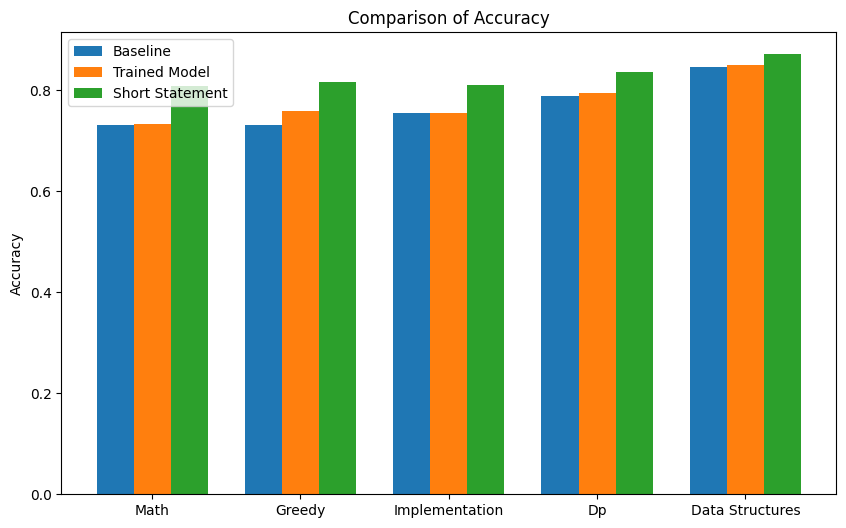

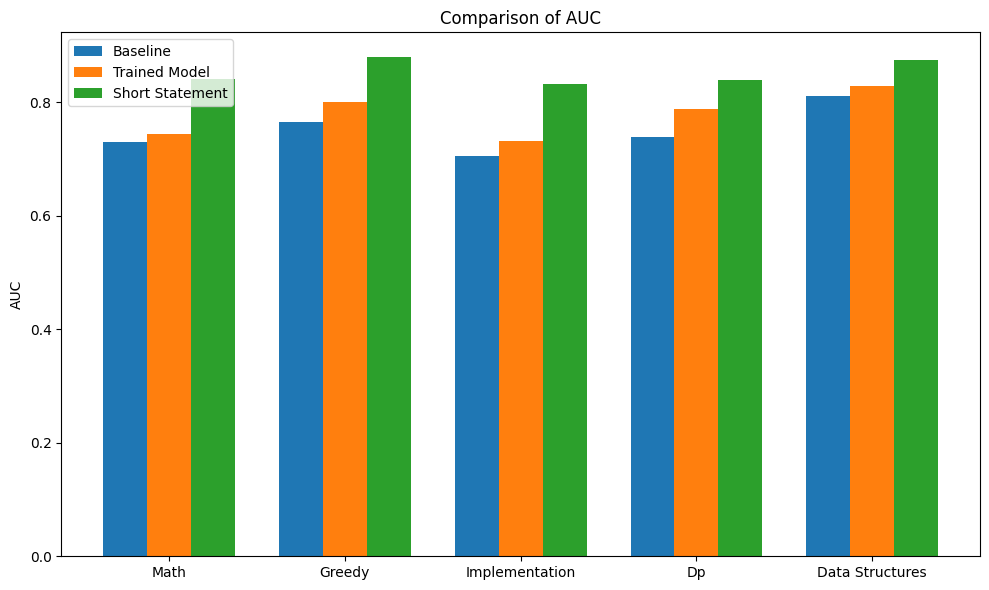

In [8]:
df1 = pd.DataFrame(baseline)
df2 = pd.DataFrame(trained_model)
df3 = pd.DataFrame(short_statement)
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# Plotting
categories = combined_df['Category'].unique()
x = np.arange(len(categories))  # the label locations
width = 0.25  # the width of the bars

# Accuracy plot
fig_accur = plt.figure(figsize=(10, 6))
ax_accur = fig_accur.add_subplot(111)

set_1 = combined_df[combined_df['Dataset'] == "Baseline"]["Accuracy"]
set_2 = combined_df[combined_df['Dataset'] == "Trained Model"]["Accuracy"]
set_3 = combined_df[combined_df['Dataset'] == "Short Statement"]["Accuracy"]


ax_accur.bar(x - width, set_1, width, label='Baseline')
ax_accur.bar(x, set_2, width, label='Trained Model')
ax_accur.bar(x + width, set_3, width, label='Short Statement')
ax_accur.set_ylabel('Accuracy')
ax_accur.set_title("Comparison of Accuracy")
ax_accur.set_xticks(x)
ax_accur.set_xticklabels(categories)
ax_accur.legend(loc="upper left")

# AUC plot
fig_auc = plt.figure(figsize=(10, 6))
ax_auc = fig_auc.add_subplot(111)

set_1 = combined_df[combined_df['Dataset'] == "Baseline"]["AUC"]
set_2 = combined_df[combined_df['Dataset'] == "Trained Model"]["AUC"]
set_3 = combined_df[combined_df['Dataset'] == "Short Statement"]["AUC"]


ax_auc.bar(x - width, set_1, width, label='Baseline')
ax_auc.bar(x, set_2, width, label='Trained Model')
ax_auc.bar(x + width, set_3, width, label='Short Statement')
ax_auc.set_ylabel('AUC')
ax_auc.set_title("Comparison of AUC")
ax_auc.set_xticks(x)
ax_auc.set_xticklabels(categories)
ax_auc.legend(loc="upper left")

# Display both plots
plt.tight_layout()
plt.show()
